# P3.2: Using xradar to plot radar data

In [2]:
import xarray as xr
import xradar as xd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os

## 1. Reading data

As outlined in practical 1 part 2, [xradar](https://docs.openradarscience.org/projects/xradar/en/stable/) can be used to read data in to a [DataTree](https://xarray-datatree.readthedocs.io/en/latest/data-structures.html). You can also read a single sweep using xarray with the cradial engine ```xr.open_dataset(radar_file, group="sweep_0", engine="cfradial1")```, but in this notebook we will continue with the datatree.

In [3]:
data_folder = '/home/jupyter-eeslb/iar/practical2/' #change this to your own directory!
radar_file = os.path.join(data_folder,'ncas-mobile-x-band-radar-1_lyneham_20230622-184423_vol_v1.0.0.nc')
radar = xd.io.open_cfradial1_datatree(radar_file)
radar

DataTree('root', parent=None)
│   Dimensions:              (frequency: 1, sweep: 6)
│   Coordinates:
│     * frequency            (frequency) float32 4B 9.401e+09
│   Dimensions without coordinates: sweep
│   Data variables: (12/13)
│       volume_number        float64 8B ...
│       platform_type        |S32 32B ...
│       primary_axis         |S32 32B ...
│       status_str           |S13738 14kB ...
│       instrument_type      |S32 32B ...
│       time_coverage_start  |S32 32B ...
│       ...                   ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       altitude_agl         float64 8B ...
│       sweep_group_name     (sweep) <U9 216B 'sweep_0.0' ... 'sweep_5.0'
│       sweep_fixed_angle    (sweep) float32 24B ...
│   Attributes: (12/13)
│       title:               Moments from the NCAS Mobile X-band Radar 1 (NXPOL1)...
│       institution:         National Centre for Atmospheric Science (NCAS)
│       references:          https://doi.org/10.5194/amt-11-6481-2018
│       comment:             (1) platform_type attribute values are specific to C...
│       instrument_name:     ncas-mobile-x-band-radar-1
│       scan_id:             0
│       ...                  ...
│       ray_times_increase:  true
│       Conventions:         CfRadial-1.4 NCAS-Radar-1.0 instrument_parameters ra...
│       source:              NCAS X-Band Mobile Radar unit 1
│       history:             2024-04-09T14:56:23 Level 2 Version 1, processed fil...
│       site_name:           MOD Lyneham
│       scan_name:           volume
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_antenna_gain_v      float32 4B ...
│           radar_beam_width_h        float32 4B ...
│           radar_antenna_gain_h      float32 4B ...
│           radar_receiver_bandwidth  float32 4B ...
│           radar_beam_width_v        float32 4B ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/55)
│           time                      |S32 32B ...
│           pulse_width               timedelta64[ns] 8B ...
│           xmit_power_h              float32 4B ...
│           xmit_power_v              float32 4B ...
│           two_way_waveguide_loss_h  float32 4B ...
│           two_way_waveguide_loss_v  float32 4B ...
│           ...                        ...
│           zdr_correction            float32 4B ...
│           ldr_correction_h          float32 4B ...
│           ldr_correction_v          float32 4B ...
│           system_phidp              float32 4B ...
│           test_power_h              float32 4B ...
│           test_power_v              float32 4B ...
├── DataTree('georeferencing_correction')
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 360, range: 332)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 3kB 2023-06-22T18:44:...
│         * range                      (range) float32 1kB 150.0 450.0 ... 9.945e+04
│           elevation                  (azimuth) float32 1kB ...
│         * azimuth                    (azimuth) float32 1kB 0.005493 1.011 ... 359.0
│           latitude                   float64 8B ...
│           longitude                  float64 8B ...
│           altitude                   float64 8B ...
│       Data variables: (12/50)
│           sweep_number               float64 8B ...
│           sweep_mode                 <U20 80B 'azimuth_surveillance'
│           prt_mode                   |S32 32B ...
│           follow_mode                |S32 32B ...
│           sweep_fixed_angle          float32 4B ...
│           ray_start_range            (azimuth) float32 1kB ...
│           ...                         ...
│           dBuZ                       (azimuth, range) float32 478kB ...
│           dBuZv                      (azimuth, range) float32 478kB ...
│  

Within this DataTree there are groups for global variables such as the radar parameters and calibration and then a group for each radar sweep. 

In [4]:
radar.groups

('/',
 '/radar_parameters',
 '/radar_calibration',
 '/georeferencing_correction',
 '/sweep_0',
 '/sweep_1',
 '/sweep_2',
 '/sweep_3',
 '/sweep_4',
 '/sweep_5')

We can look at an individual sweep. We can explore the data array in the notebook to investigate the coordinates and the variables. Note: ```radar['sweep_0']``` and ```radar.sweep_0``` are different notations for doing the same thing. 

In [5]:
radar['sweep_0'] 

DataTree('sweep_0', parent="root")
    Dimensions:                    (azimuth: 360, range: 332)
    Coordinates:
        time                       (azimuth) datetime64[ns] 3kB 2023-06-22T18:44:...
      * range                      (range) float32 1kB 150.0 450.0 ... 9.945e+04
        elevation                  (azimuth) float32 1kB ...
      * azimuth                    (azimuth) float32 1kB 0.005493 1.011 ... 359.0
        latitude                   float64 8B ...
        longitude                  float64 8B ...
        altitude                   float64 8B ...
    Data variables: (12/50)
        sweep_number               float64 8B ...
        sweep_mode                 <U20 80B 'azimuth_surveillance'
        prt_mode                   |S32 32B ...
        follow_mode                |S32 32B ...
        sweep_fixed_angle          float32 4B ...
        ray_start_range            (azimuth) float32 1kB ...
        ...                         ...
        dBuZ                       (azimuth, range) float32 478kB ...
        dBuZv                      (azimuth, range) float32 478kB ...
        uKDP                       (azimuth, range) float32 478kB ...
        uKDPu                      (azimuth, range) float32 478kB ...
        uPhiDP                     (azimuth, range) float32 478kB ...
        uPhiDPu                    (azimuth, range) float32 478kB ...

You can see from this that the dimensions are azimuth and range. There is a latitude and longitude coordinate but these are single values representing the location of the radar. In order to make plots of the data on a map, as we have done with PyArt, we need to georeference the data to calculate Cartesian coordinates from antenna coordinates.

In [6]:
radar = radar.xradar.georeference()
radar.sweep_0

DataTree('sweep_0', parent="root")
    Dimensions:                    (azimuth: 360, range: 332)
    Coordinates:
        time                       (azimuth) datetime64[ns] 3kB 2023-06-22T18:44:...
      * range                      (range) float32 1kB 150.0 450.0 ... 9.945e+04
        elevation                  (azimuth) float32 1kB 1.0 1.0 1.0 ... 1.0 1.0 1.0
      * azimuth                    (azimuth) float32 1kB 0.005493 1.011 ... 359.0
        latitude                   float64 8B 51.51
        longitude                  float64 8B -2.005
        altitude                   float64 8B 157.7
        crs_wkt                    int64 8B 0
        x                          (azimuth, range) float32 478kB 0.01438 ... -1....
        y                          (azimuth, range) float32 478kB 150.0 ... 9.939...
        z                          (azimuth, range) float32 478kB 160.0 ... 2.475...
    Data variables: (12/50)
        sweep_number               float64 8B ...
        sweep_mode                 <U20 80B 'azimuth_surveillance'
        prt_mode                   |S32 32B ...
        follow_mode                |S32 32B ...
        sweep_fixed_angle          float32 4B ...
        ray_start_range            (azimuth) float32 1kB ...
        ...                         ...
        dBuZ                       (azimuth, range) float32 478kB ...
        dBuZv                      (azimuth, range) float32 478kB ...
        uKDP                       (azimuth, range) float32 478kB ...
        uKDPu                      (azimuth, range) float32 478kB ...
        uPhiDP                     (azimuth, range) float32 478kB ...
        uPhiDPu                    (azimuth, range) float32 478kB ...

Now you can see we have additional coordinates of ```x```, ```y``` and ```z``` which are in distances from the radar. We also have a ```crs_wkt``` coordinate which contains details of the cartographic projection (the Azimuthal Equidistant Projection is used, like we used with PyArt).

### Have a look at some data
Now we can poke around in the radar data array and look at individual variables. The Attributes show us the important information, the same as what was included in the PyArt fields dictionaries.

In [7]:
radar['sweep_0'].dBZ

<xarray.DataArray 'dBZ' (azimuth: 360, range: 332)> Size: 478kB
[119520 values with dtype=float32]
Coordinates:
    time       (azimuth) datetime64[ns] 3kB 2023-06-22T18:44:49.353000 ... 20...
  * range      (range) float32 1kB 150.0 450.0 750.0 ... 9.915e+04 9.945e+04
    elevation  (azimuth) float32 1kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
  * azimuth    (azimuth) float32 1kB 0.005493 1.011 2.005 ... 357.0 358.0 359.0
    latitude   float64 8B 51.51
    longitude  float64 8B -2.005
    altitude   float64 8B 157.7
    crs_wkt    int64 8B 0
    x          (azimuth, range) float32 478kB 0.01438 0.04314 ... -1.735e+03
    y          (azimuth, range) float32 478kB 150.0 449.9 ... 9.939e+04
    z          (azimuth, range) float32 478kB 160.0 165.0 ... 2.475e+03
Attributes:
    long_name:               reflectivity_from_horizontal_polarization
    proposed_standard_name:  radar_equivalent_reflectivity_factor_h
    units:                   dBZ
    sampling_ratio:          1.0
    grid_mapping:            grid_mapping

We can also get just the values as an array.

In [8]:
radar['sweep_0'].dBZ.values

array([[ 13.5, -17. , -23. , ...,   nan,   nan,   nan],
       [ 24.5, -13.5, -22.5, ...,   nan,   nan,   nan],
       [  6.5,  -8. ,  -9. , ...,   nan,   nan,   nan],
       ...,
       [  nan, -25. , -22. , ...,   nan,   nan,   nan],
       [ 15. , -24. , -20.5, ...,   nan,   nan,   nan],
       [  nan, -26. , -19.5, ...,   nan,   nan,   nan]], dtype=float32)

## 2. Plotting

Since the radar data is now in an xarray DataArray we can use the [xarray plotting capabilities](https://docs.xarray.dev/en/latest/user-guide/plotting.html).

### 2.1 Plotting PPIs 

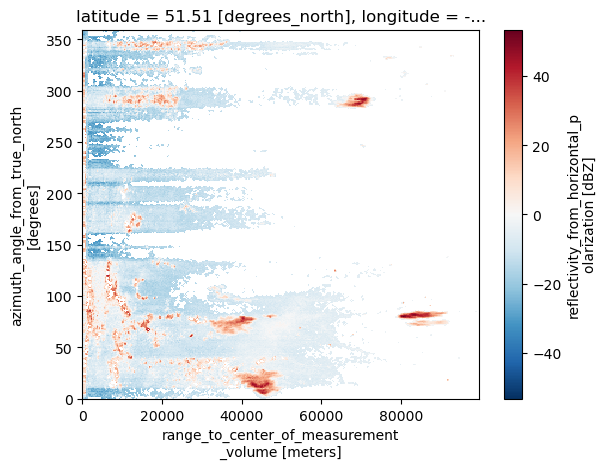

In [9]:
radar.sweep_0.dBZ.plot()

This plot doesn't look like quite what we want, we need to tell the plotting what to use as x and y.

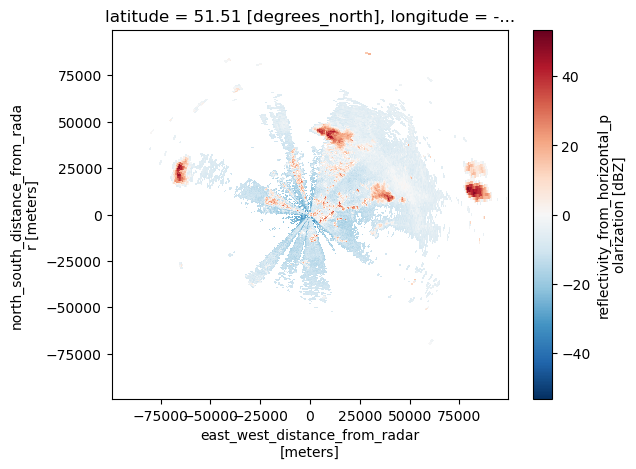

In [10]:
radar.sweep_0.dBZ.plot(x='x',
                       y='y'
                       )

### 2.2 Plot a PPI map

Now we can create a map as we did with PyArt.

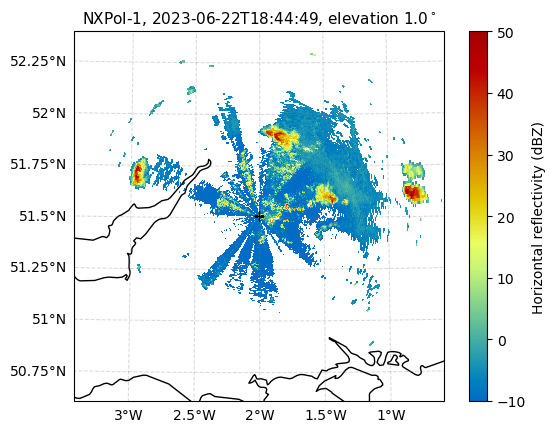

In [11]:
plot_crs = ccrs.AzimuthalEquidistant(central_longitude=radar.longitude.values, 
                                     central_latitude=radar.latitude.values)

fig = plt.figure()
ax = fig.add_subplot(111, projection=plot_crs)

radar.sweep_0.dBZ.plot(x='x',
                       y='y',
                       ax=ax,
                       vmin=-10,
                       vmax=50,
                       cmap='HomeyerRainbow',
                       extend = 'neither', #extend ends of colour bar or not
                       cbar_kwargs={'label': 'Horizontal reflectivity (dBZ)'} #colourbar label
                      )

# add coastlines
ax.coastlines(resolution = '10m')

# add gridlines
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    rotate_labels=False,
    linewidth=0.75,
    color="gray",
    alpha=0.3,
    linestyle="--"
    )
gl.top_labels = False
gl.right_labels = False

ax.plot(radar.longitude,radar.latitude,marker = '+', markersize = 7, color = 'k')

start_dt = str(radar.sweep_0.time[0].values).split('.')[0]
elevation = radar.sweep_0.elevation.values[0]
instrument = 'NXPol-1'
title = f'{instrument}, {start_dt}, elevation {elevation}$^\\circ$'
ax.set_title(title,fontsize=11);

### 2.3 Plotting RHIs

xradar can also be used to make RHI plots. We read in the data as before and georeference. 

In [12]:
radar_file = os.path.join(data_folder,'ncas-mobile-x-band-radar-1_lyneham_20230612-151859_rhi_v1.0.0.nc')
radar = xd.io.open_cfradial1_datatree(radar_file)
radar = radar.xradar.georeference()

radar

DataTree('root', parent=None)
│   Dimensions:              (frequency: 1, sweep: 1)
│   Coordinates:
│     * frequency            (frequency) float32 4B 9.401e+09
│   Dimensions without coordinates: sweep
│   Data variables: (12/13)
│       volume_number        float64 8B ...
│       platform_type        |S32 32B ...
│       primary_axis         |S32 32B ...
│       status_str           |S7490 7kB ...
│       instrument_type      |S32 32B ...
│       time_coverage_start  |S32 32B ...
│       ...                   ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       altitude_agl         float64 8B ...
│       sweep_group_name     (sweep) <U9 36B 'sweep_0.0'
│       sweep_fixed_angle    (sweep) float32 4B ...
│   Attributes: (12/13)
│       title:               Moments from the NCAS Mobile X-band Radar 1 (NXPOL1)...
│       institution:         National Centre for Atmospheric Science (NCAS)
│       references:          https://doi.org/10.5194/amt-11-6481-2018
│       comment:             (1) platform_type attribute values are specific to C...
│       instrument_name:     ncas-mobile-x-band-radar-1
│       scan_id:             0
│       ...                  ...
│       ray_times_increase:  true
│       Conventions:         CfRadial-1.4 NCAS-Radar-1.0 instrument_parameters ra...
│       source:              NCAS X-Band Mobile Radar unit 1
│       history:             2024-04-09T16:52:54 Level 2 Version 1, processed fil...
│       site_name:           MOD Lyneham
│       scan_name:           range_height_indicator
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_antenna_gain_v      float32 4B ...
│           radar_beam_width_h        float32 4B ...
│           radar_antenna_gain_h      float32 4B ...
│           radar_receiver_bandwidth  float32 4B ...
│           radar_beam_width_v        float32 4B ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/55)
│           time                      |S32 32B ...
│           pulse_width               timedelta64[ns] 8B ...
│           xmit_power_h              float32 4B ...
│           xmit_power_v              float32 4B ...
│           two_way_waveguide_loss_h  float32 4B ...
│           two_way_waveguide_loss_v  float32 4B ...
│           ...                        ...
│           zdr_correction            float32 4B ...
│           ldr_correction_h          float32 4B ...
│           ldr_correction_v          float32 4B ...
│           system_phidp              float32 4B ...
│           test_power_h              float32 4B ...
│           test_power_v              float32 4B ...
├── DataTree('georeferencing_correction')
└── DataTree('sweep_0')
        Dimensions:                    (elevation: 39, range: 248)
        Coordinates:
            time                       (elevation) datetime64[ns] 312B 2023-06-12T15:...
          * range                      (range) float32 992B 150.0 450.0 ... 7.425e+04
            azimuth                    (elevation) float32 156B 180.0 180.0 ... 180.0
          * elevation                  (elevation) float32 156B 1.011 2.01 ... 39.01
            latitude                   float64 8B 51.51
            longitude                  float64 8B -2.005
            altitude                   float64 8B 157.7
            crs_wkt                    int64 8B 0
            x                          (elevation, range) float32 39kB -1.311e-05 ......
            y                          (elevation, range) float32 39kB -150.0 ... -5....
            z                          (elevation, range) float32 39kB 160.0 ... 4.70...
        Data variables: (12/50)
            sweep_number               float64 8B ...
            sweep_mode                 <U3 12B 'rhi'
            prt_mode                   |S32 32B ...
            follow_mode                |S3

We just need to create a plot with the range and height as x and y.

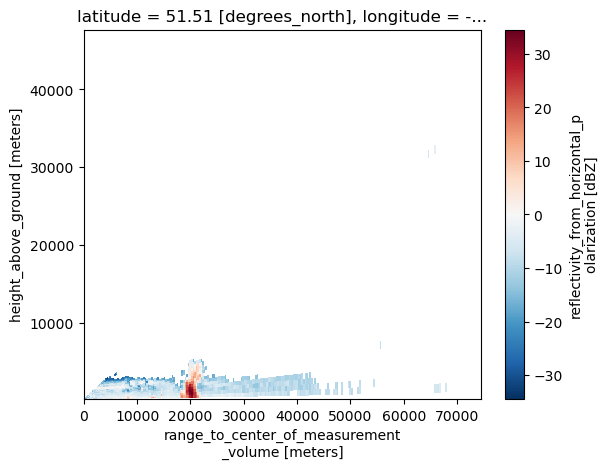

In [13]:
radar.sweep_0.dBZ.plot(x = 'range', y='z')

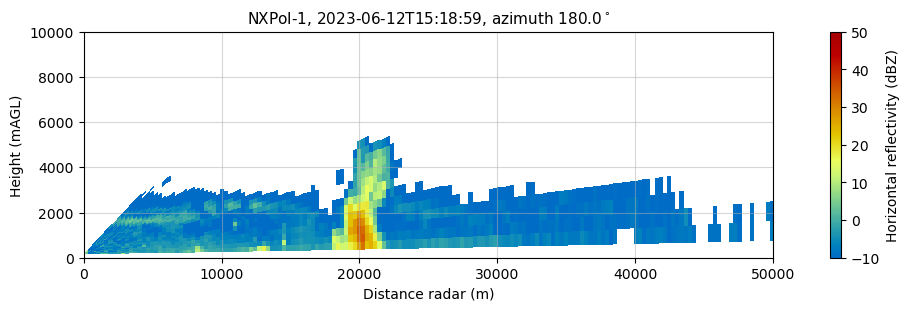

In [34]:
#set up figure
fig = plt.figure(figsize=(9,3), constrained_layout = True) 
ax = plt.subplot(111)

radar.sweep_0.dBZ.plot(x = 'range',
                       y='z',
                       vmin = -10,
                       vmax = 50,
                       extend = 'neither',
                       cmap = 'HomeyerRainbow',
                       cbar_kwargs={'label': 'Horizontal reflectivity (dBZ)'}
                      )
                               
# change axes limits
ax.set_ylim([0,10000])
ax.set_xlim([0,50000])

# add grid to axes
ax.grid(alpha = 0.5,
        zorder = 0)

# axes labels
ax.set_xlabel('Distance radar (m)')
ax.set_ylabel('Height (mAGL)')

#set title
start_dt = str(radar.sweep_0.time[0].values).split('.')[0]
azimuth = radar.sweep_0.azimuth.values[0]
instrument = 'NXPol-1'
title = f'{instrument}, {start_dt}, azimuth {azimuth}$^\\circ$'
ax.set_title(title,fontsize=11);

You can build on this to create subplots of multiple variables or datasets using the examples in practical 2. There are also examples online of using xradar for further reference.

https://docs.openradarscience.org/projects/xradar/en/stable/usage.html
https://projectpythia.org/radar-cookbook/notebooks/foundations/interactive-radar-visualization.html
